In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

<Axes: >

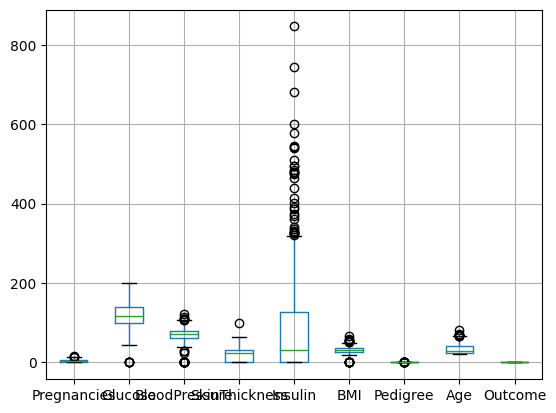

In [5]:
df.boxplot()

In [6]:
def remove_outliers(col_name,df):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    df = df[(df[col_name]<=upper_range) & (df[col_name]>= lower_range)]
    return df
col_list = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'Pedigree',	'Age',	'Outcome']

for i in col_list:
    df = remove_outliers(i,df)

<Axes: >

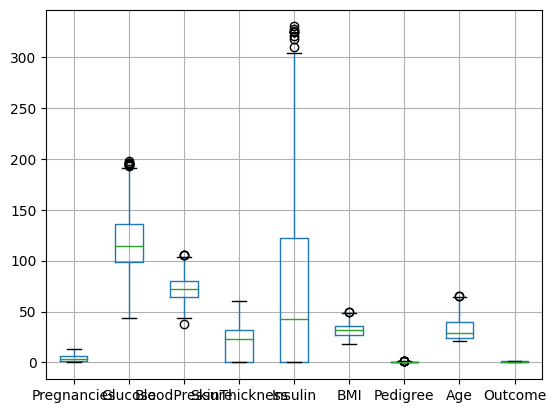

In [7]:
df.boxplot()

In [8]:
X = df.iloc[:,:8]
Y = df.iloc[:,8:]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train,Y_train.values.ravel())
knn_pred = knn_fit.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [14]:
accuracy_score(Y_test,knn_pred)

0.75

In [15]:
f1_score(Y_test,knn_pred)

0.5555555555555556

In [16]:
recall_score(Y_test,knn_pred)

0.5714285714285714

In [17]:
precision_score(Y_test,knn_pred)

0.5405405405405406

In [18]:
cm = confusion_matrix(Y_test,knn_pred)

In [19]:
cm

array([[76, 17],
       [15, 20]])

<Axes: >

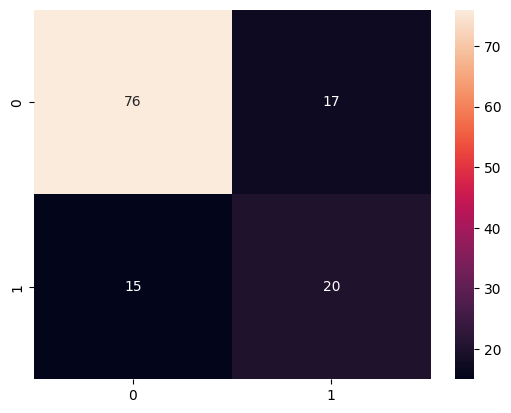

In [20]:
sns.heatmap(cm,annot=True)